<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/russia_imports_med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports Medical and Yarn

data source:

https://wits.worldbank.org/trade/comtrade/en/country/RUS/year/2021/tradeflow/Imports/partner/ALL/product/....

In [1]:
import pandas as pd

Ultra High Molecular Weight Polyethylene with a commercial name Dyneema was introduced. This reduced the weight of the garment by about 15%. These are now used to produce cut resistant gloves, helmets and other protective garments.

source:https://textilelearner.net/defence-textiles-properties-and-applications/

HS code for Dyneema : https://www.exportgenius.in/hs-code/russia/dyneema


https://www.cybex.in/hs-codes/antibiotics-heading-2941.aspx

294110 	HS Codes Of Penicillins and their derivative with a penicillanic acid structure; salts thereof :

294120 	HS Codes Of Streptomycins and their derivatives; salts thereof :

294130 	HS Codes Of Tetracyclines and their derivatives, salts thereof :

294190 	HS Codes Of Other

textiles:
Product Description Search Results of DYNEEMA
deffence textile according to https://textilelearner.net/defence-textiles-properties-and-applications/

HS code : 560750

560750:	Twine, cordage, ropes, cables; of synthetic fibres other than polyethylene or polypropylene, whether or not plaited, braided or impregnated, coated, covered or sheathed with rubber or plastics

https://www.cybex.in/hs-codes/of-dyneema.aspx


COTTON info: 
https://www.icac.org/Content/EventDocuments/PdfFiles593749cb_0aed_41b0_a324_e3280c541f7e/Russia_Country%20Profile_eng.pdf

HS code ; 520100
investement in production of cotton since 2015, look at decrease in exports rather than increase in import

source: https://textilelearner.net/military-textiles-features-characteristics-and-materials/

hs code source: https://www.cybex.in/hs-codes/

The materials that are used now a days for making military dresses, are:

    Polyester
    Cotton - HS code 520100 (check for decline in exports)
    High Tenacity Polyester : HS code 540220	
    Kevlar®  HS code 392690
    Coolmax®
    Meta Aramid®
    Lycra
    Nomex®

In [4]:
def whatyears (start, end):
  listo = []
  for item in range(start, end):
    listo.append(str(item))
  return listo


In [5]:
def read_table(links):
  table = pd.read_html(links)
  cols = table[0].loc[0]
  data = table[0].iloc[1:2,:]
  data.columns = cols
  return data

In [6]:
def wits_call_in(name ,codes_list, start, end):
  list_product=[]
  df_list = []
  years = whatyears(start, (end+1))
  for i in years:
    temp= 'https://wits.worldbank.org/trade/comtrade/en/country/{}/year/{}/tradeflow/Imports/partner/WLD/product/'.format(name,i)
    for p in codes_list:
      prod = str(temp+p)
      list_product.append(prod)

  for links in list_product:
    temp_df = read_table(links)
    temp_df['Year'] = pd.to_datetime(temp_df['Year'], format='%Y')
    temp_df['Quantity']=pd.to_numeric(temp_df['Quantity'], errors='coerce')
    temp_df['Trade Value 1000USD']=pd.to_numeric(temp_df['Trade Value 1000USD'], errors='coerce')

    df_list.append(temp_df)
  df_data =pd.concat(df_list)

  return df_data


In [7]:
def wits_call_ex(name ,codes_list, start, end):
  list_product=[]
  df_list = []
  years = whatyears(start, (end+1))
  for i in years:
    temp= 'https://wits.worldbank.org/trade/comtrade/en/country/{}/year/{}/tradeflow/Exports/partner/WLD/product/'.format(name,i)
    for p in codes_list:
      prod = str(temp+p)
      list_product.append(prod)

  for links in list_product:
    temp_df = read_table(links)
    temp_df['Year'] = pd.to_datetime(temp_df['Year'], format='%Y')
    temp_df['Quantity']=pd.to_numeric(temp_df['Quantity'], errors='coerce')
    temp_df['Trade Value 1000USD']=pd.to_numeric(temp_df['Trade Value 1000USD'], errors='coerce')

    df_list.append(temp_df)
  df_data =pd.concat(df_list)

  return df_data

In [8]:
country = 'RUS'
year_start = 2011 
year_end = 2022

# enter list of codes to be queried from wits
hs_codes = ['294110','294130','392690','540220','560750']
#return imports
imports = wits_call_in(country ,hs_codes, year_start, year_end)


In [9]:
imports_list = []
for item in hs_codes:
  temp = imports[imports['ProductCode']==item]
  temp['Quantity'] = temp['Quantity'].interpolate()
  temp['Quantity Unit'] = temp['Quantity Unit'].fillna('guessed')
  imports_list.append(temp)

<ipython-input-9-f0147b64bf3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Quantity'] = temp['Quantity'].interpolate()
<ipython-input-9-f0147b64bf3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Quantity Unit'] = temp['Quantity Unit'].fillna('guessed')


In [10]:

for df in range(len(imports_list)):
  code_name = imports_list[df]['ProductCode'].iloc[0]
  data = imports_list[df]
  data.to_csv('/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/wits_hs_code_' + code_name+'.csv', index=False)

In [11]:
# enter list of codes to be queried from wits
hs_codes = ['520100'] #cotton
exports = wits_call_ex(country ,hs_codes, year_start, year_end)


In [12]:
exports.to_csv('/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/wits_cotton_export.csv')

# Graphing WITS & Levada

In [14]:
code_descrp = {'294110': 'Penicillins and their derivative with a penicillanic acid structure',
'294130' : 'Tetracyclines and their derivatives (antibiotics)',
'392690' : 'Kevlar ** according to cybex (**Plastics; other articles n.e.s. in chapter 39**)',
'540220' :'High Tenacity Polyester',
'560750' :'Twine, cordage, ropes, cables; of synthetic fibres other than polyethylene or polypropylene',}

In [15]:
import os
import pandas as pd
import numpy as np

graph_df_list = []

for filename in os.listdir('/content/drive/MyDrive/RUSSdata/WITS_SPRI_info'):
  if filename.startswith('wits_hs'):
    temp= pd.read_csv('/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/'+filename)
    temp['Year'] =pd.to_datetime(temp['Year'])
    graph_df_list.append(temp)

In [22]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

color = ['gold', 'cyan','orangered', 'springgreen','magenta']


for i in range(len(graph_df_list)):
  temp1 = graph_df_list[i]

  code = str(temp1['ProductCode'].iloc[0])
  title = code_descrp[code]
  fig, ax = plt.subplots(figsize=(8, 6)) #sharex=True, sharey=True

  ax.set_ylabel('Kg', fontsize = 14)
  ax.set_xlabel('Years', fontsize = 14)
  ax.xaxis.set_major_locator(mdates.YearLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
  ax.set_facecolor('oldlace')

  ax.plot(temp1['Year'], temp1['Quantity'], color =color[i], linewidth =3)
  ax.set_title(title, fontsize = 14)
  plt.savefig(f'/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/graphs/chart_'+code+'.jpg', bbox_inches='tight')
  plt.close()


In [23]:
approval_df = []
for filename in os.listdir('/content/drive/MyDrive/RUSSdata/Levada/2023-04-06'):
  temp= pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/2023-04-06/'+filename)
  temp['date'] =pd.to_datetime(temp['date'], format='%Y-%m')
  temp['name'] =filename
  temp_short=temp[temp['date']>'2019']
  # temp_app = temp_short[['date', 'Approve', 'name']]
  approval_df.append(temp_short)

In [24]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

color = ['cyan','springgreen',  'blue', 'red', 'orangered']

for i in range(len(approval_df)):
  fig, ax = plt.subplots(figsize=(9, 5)) #sharex=True, sharey=True
  plt.ylim(20,100)
  temp_app = approval_df[i]
  name = str(temp_app['name'].iloc[0])
  if name.startswith('Levada'):
    ax.plot(temp_app['date'], temp_app['Approve'], color =color[i], linewidth =3)
    name= name[7:-4]
  if name.startswith('2023'):
    name ='Negative '+name[11:-4]
    ax.plot(temp_app['date'], temp_app['Negative'], color =color[i], linewidth =3)
  ax.set_ylabel('Full Range 0% - 100%', fontsize = 14)
  ax.set_xlabel('Years', fontsize = 14)
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
  plt.grid(True)
  ax.set_facecolor('oldlace')
  ax.set_title(name, fontsize = 14)
  plt.savefig(f'/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/graphs/grf_'+name+'.jpg', bbox_inches='tight')
  plt.close()

In [37]:
approval_df[4].head()

,date,Positive,Negative,Difficult to answer,name
104,2019-02-01,42.0,45.0,13.0,2023-04-06_Attitude to the EU.csv
105,2019-05-01,38.0,44.0,19.0,2023-04-06_Attitude to the EU.csv
106,2019-08-01,49.0,34.0,17.0,2023-04-06_Attitude to the EU.csv
107,2019-11-01,52.0,33.0,15.0,2023-04-06_Attitude to the EU.csv
108,2020-01-01,49.0,36.0,15.0,2023-04-06_Attitude to the EU.csv


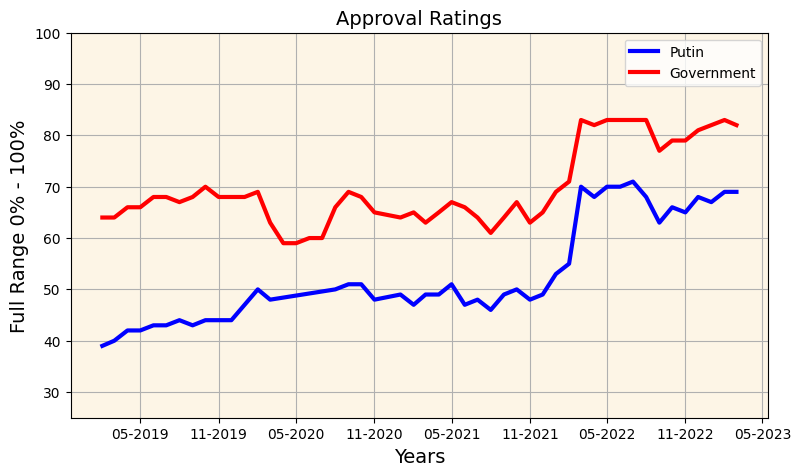

In [32]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(9, 5)) #sharex=True, sharey=True

plt.ylim(25,100)

ax.plot(approval_df[2]['date'], approval_df[2]['Approve'], color ='blue', linewidth =3)
ax.plot(approval_df[0]['date'], approval_df[0]['Approve'], color ='red', linewidth =3)
ax.set_ylabel('Full Range 0% - 100%', fontsize = 14)
ax.set_xlabel('Years', fontsize = 14)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.grid(True)
ax.set_facecolor('oldlace')
ax.set_title('Approval Ratings', fontsize = 14)
plt.legend(['Putin', 'Government'])
plt.savefig(f'/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/graphs/grf_combo_gov.jpg', bbox_inches='tight')


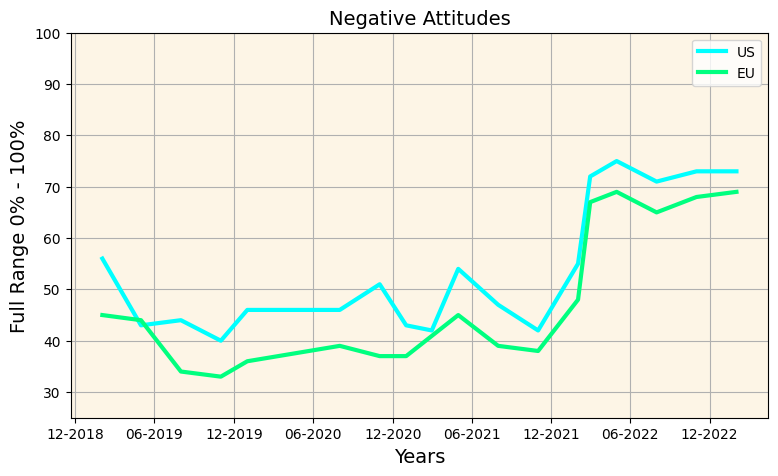

In [38]:
fig, ax = plt.subplots(figsize=(9, 5)) #sharex=True, sharey=True

plt.ylim(25,100)

ax.plot(approval_df[3]['date'], approval_df[3]['Negative'], color ='cyan', linewidth =3)
ax.plot(approval_df[4]['date'], approval_df[4]['Negative'], color ='springgreen', linewidth =3)
ax.set_ylabel('Full Range 0% - 100%', fontsize = 14)
ax.set_xlabel('Years', fontsize = 14)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.grid(True)
ax.set_facecolor('oldlace')
ax.set_title('Negative Attitudes', fontsize = 14)
plt.legend(['US', 'EU'])
plt.savefig(f'/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/graphs/grf_combo_eu.jpg', bbox_inches='tight')

# Sipri


https://armstrade.sipri.org/armstrade/page/values.php

manual harvest

In [ ]:
import os
import pandas as pd
import numpy as np


In [ ]:
imports_ru = pd.read_csv('/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/TIV-Import-RUS-2011-2022.csv')
exports_ru = pd.read_csv('/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/TIV-Export-RUS-2011-2022.csv')
export_ch = pd.read_csv('/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/TIV-Export-CHI-2011-2022.csv')

In [ ]:
def re_arrange(data):
    col_names = data.loc[9].to_list()[1:-1]
    col_names.insert(0,data.columns[0] )
    data_spri= data.iloc[10:, :-1]
    data_spri.columns=col_names
    shorts = data_spri[(data_spri.iloc[:, 0]=='Total') | (data_spri.iloc[:, 0]=='Russia') | (data_spri.iloc[:, 0]=='China')]
    shorts = shorts.fillna(0) # for graphing convenience as NaN may not be zero in this case
    test = shorts.set_index(shorts.columns[0]).T.reset_index()
    test= test.iloc[:-1, :]
    return test


In [ ]:
russ_imports = re_arrange(imports_ru)
russ_exports = re_arrange(exports_ru)

In [ ]:

russ_imports['index']=pd.to_numeric(russ_imports['index'], errors='coerce')
russ_imports['China']=pd.to_numeric(russ_imports['China'], errors='coerce')
russ_imports['Total'] =pd.to_numeric(russ_imports['Total'], errors='coerce')

In [ ]:
russ_exports['index']=pd.to_numeric(russ_exports['index'], errors='coerce')
russ_exports['China']=pd.to_numeric(russ_exports['China'], errors='coerce')
russ_exports['Total'] =pd.to_numeric(russ_exports['Total'], errors='coerce')

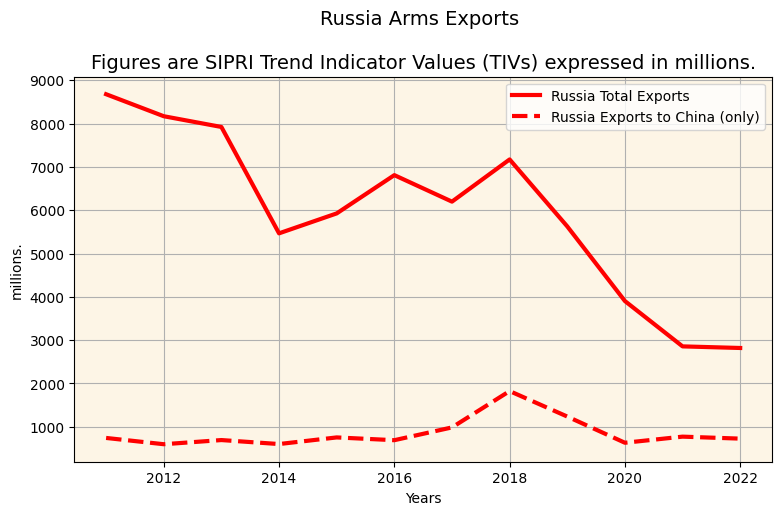

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5)) #sharex=True, sharey=True


ax.plot(russ_exports['index'],russ_exports['Total'], color ='red', linewidth =3)
ax.plot(russ_exports['index'],russ_exports['China'], color ='red', linestyle ='dashed', linewidth =3)

plt.xlabel('Years')
plt.ylabel('millions.')
plt.grid(True)
ax.set_facecolor('oldlace')
plt.legend(['Russia Total Exports', 'Russia Exports to China (only)'],facecolor='white')
plt.title('Russia Arms Exports \n\nFigures are SIPRI Trend Indicator Values (TIVs) expressed in millions.', fontsize = 14)
plt.savefig(f'/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/graphs/sipri_export.jpg', bbox_inches='tight')

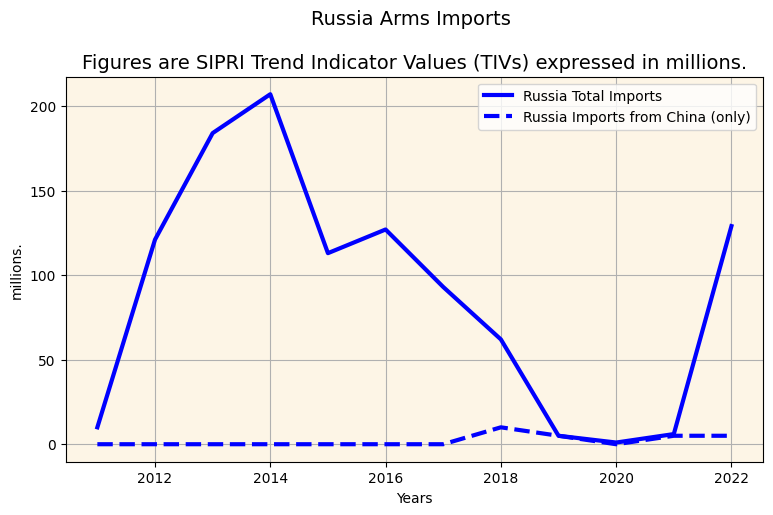

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5)) #sharex=True, sharey=True


ax.plot(russ_imports['index'],russ_imports['Total'], color ='blue', linewidth =3)
ax.plot(russ_imports['index'],russ_imports['China'], color ='blue', linestyle ='dashed', linewidth =3)

plt.xlabel('Years')
plt.ylabel('millions.')
plt.grid(True)
ax.set_facecolor('oldlace')

plt.legend(['Russia Total Imports', 'Russia Imports from China (only)'], facecolor='white')
plt.title('Russia Arms Imports \n\nFigures are SIPRI Trend Indicator Values (TIVs) expressed in millions.', fontsize = 14)
plt.savefig(f'/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/graphs/sipri_imports.jpg', bbox_inches='tight')

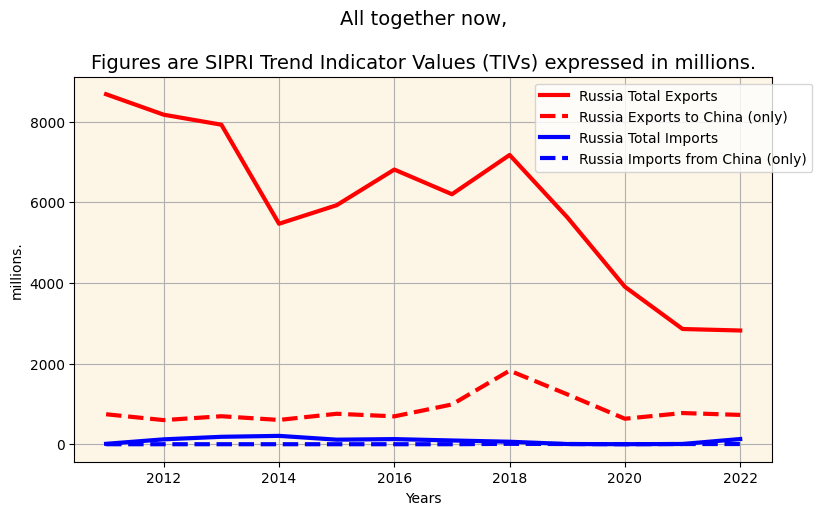

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5)) #sharex=True, sharey=True

ax.plot(russ_exports['index'],russ_exports['Total'], color ='red', linewidth =3)
ax.plot(russ_exports['index'],russ_exports['China'], color ='red', linestyle ='dashed', linewidth =3)

ax.plot(russ_imports['index'],russ_imports['Total'], color ='blue', linewidth =3)
ax.plot(russ_imports['index'],russ_imports['China'], color ='blue', linestyle ='dashed', linewidth =3)

plt.xlabel('Years')
plt.ylabel('millions.')
plt.grid(True)
ax.set_facecolor('oldlace')
plt.legend(['Russia Total Exports', 'Russia Exports to China (only)','Russia Total Imports', 'Russia Imports from China (only)'], bbox_to_anchor=[.65, 1],facecolor="white" )

plt.title('All together now,\n\nFigures are SIPRI Trend Indicator Values (TIVs) expressed in millions.', fontsize = 14)
plt.savefig(f'/content/drive/MyDrive/RUSSdata/WITS_SPRI_info/graphs/sipri_combo.jpg', bbox_inches='tight')